In [1]:
import numpy as np
import cv2 # OpenCV-Python
import pandas as pd
from pandas import Series
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import glob
image_list = []
print(len(glob.glob('../../img/train/*.jpg')))
# for filename in glob.glob('../../img/train/*.jpg'):
#     org_img = cv2.imread(filename)
#     image_list.append(org_img)

2537


# 現状のレシートを確認

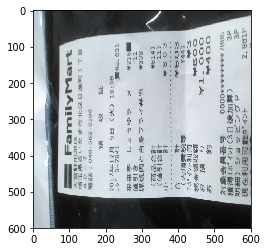

In [3]:
org_img = cv2.imread("../../img/train/a0i6ftk5.jpg")
imS = cv2.resize(org_img, (600, 600))
plt.plot(), plt.imshow(imS)
plt.show()

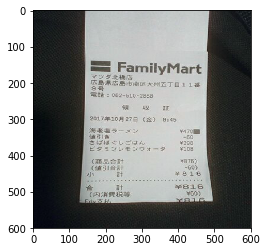

In [4]:
org_img = cv2.imread("../../img/train/a5kdj9kr.jpg")
imS = cv2.resize(org_img, (600, 600))
plt.plot(), plt.imshow(imS)
plt.show()

# 横向きを縦に変換

(1080, 1920, 3)
(1080, 1920, 3)


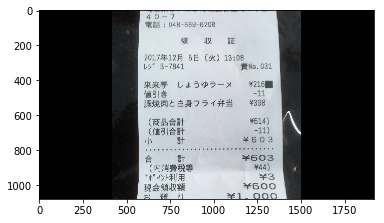

In [5]:
org_img = cv2.imread("../../img/train/a0i6ftk5.jpg")
print(org_img.shape)

if org_img.shape[1] > org_img.shape[0]:
    size = tuple([org_img.shape[1], org_img.shape[0]])
    center = tuple([int(size[0]/2), int(size[1]/2)])
    angle = -90.0
    scale = 1.0
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    img_rot = cv2.warpAffine(org_img, rotation_matrix, size, flags=cv2.INTER_CUBIC)
print(img_rot.shape)
plt.plot(), plt.imshow(img_rot)
plt.show()

In [6]:
def rt_img(org_img):
    if org_img.shape[1] > org_img.shape[0]:
        size = tuple([org_img.shape[1], org_img.shape[0]])
        center = tuple([int(size[0]/2), int(size[1]/2)])
        angle = -90.0
        scale = 1.0
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
        img_rot = cv2.warpAffine(org_img, rotation_matrix, size, flags=cv2.INTER_CUBIC)
    return img_rot


(1080, 1920, 3)


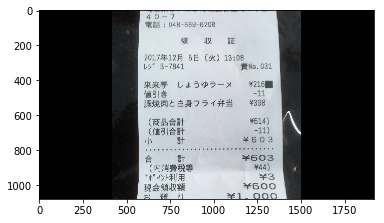

In [7]:
org_img = cv2.imread("../../img/train/a0i6ftk5.jpg")
print(org_img.shape)
plt.plot(), plt.imshow(rt_img(org_img))
plt.show()

In [8]:
def rotate_image(image, angle):
    if image.shape[1] > image.shape[0]:
        # Get the image size
        # No that's not an error - NumPy stores image matricies backwards
        image_size = (image.shape[1], image.shape[0])
        image_center = tuple(np.array(image_size) / 2)

        # Convert the OpenCV 3x2 rotation matrix to 3x3
        rot_mat = np.vstack(
            [cv2.getRotationMatrix2D(image_center, angle, 1.0), [0, 0, 1]]
        )

        rot_mat_notranslate = np.matrix(rot_mat[0:2, 0:2])

        # Shorthand for below calcs
        image_w2 = image_size[0] * 0.5
        image_h2 = image_size[1] * 0.5

        # Obtain the rotated coordinates of the image corners
        rotated_coords = [
            (np.array([-image_w2,  image_h2]) * rot_mat_notranslate).A[0],
            (np.array([ image_w2,  image_h2]) * rot_mat_notranslate).A[0],
            (np.array([-image_w2, -image_h2]) * rot_mat_notranslate).A[0],
            (np.array([ image_w2, -image_h2]) * rot_mat_notranslate).A[0]
        ]

        # Find the size of the new image
        x_coords = [pt[0] for pt in rotated_coords]
        x_pos = [x for x in x_coords if x > 0]
        x_neg = [x for x in x_coords if x < 0]

        y_coords = [pt[1] for pt in rotated_coords]
        y_pos = [y for y in y_coords if y > 0]
        y_neg = [y for y in y_coords if y < 0]

        right_bound = max(x_pos)
        left_bound = min(x_neg)
        top_bound = max(y_pos)
        bot_bound = min(y_neg)

        new_w = int(abs(right_bound - left_bound))
        new_h = int(abs(top_bound - bot_bound))

        # We require a translation matrix to keep the image centred
        trans_mat = np.matrix([
            [1, 0, int(new_w * 0.5 - image_w2)],
            [0, 1, int(new_h * 0.5 - image_h2)],
            [0, 0, 1]
        ])

        # Compute the tranform for the combined rotation and translation
        affine_mat = (np.matrix(trans_mat) * np.matrix(rot_mat))[0:2, :]

        # Apply the transform
        result = cv2.warpAffine(
            image,
            affine_mat,
            (new_w, new_h),
            flags=cv2.INTER_LINEAR
        )

        return result
    else:
        return image

(1080, 1920, 3)


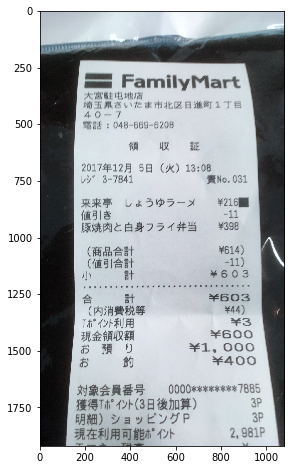

In [9]:
org_img = cv2.imread("../../img/train/a0i6ftk5.jpg")
print(org_img.shape)
plt.figure(figsize=(8,8))
plt.plot(), plt.imshow(rotate_image(org_img, -90))
plt.show()

(480, 368, 3)


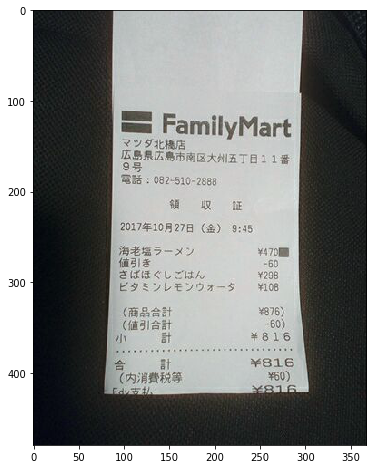

(480, 368, 3)


In [10]:
org_img = cv2.imread("../../img/train/a5kdj9kr.jpg")
print(org_img.shape)
plt.figure(figsize=(8,8))
plt.plot(), plt.imshow(rotate_image(org_img, -90))
plt.show()

print(rotate_image(org_img, -90).shape)

# レシート部分を抜き出す

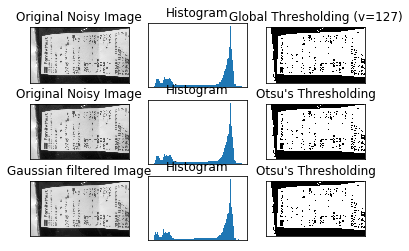

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/train/a0i6ftk5.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

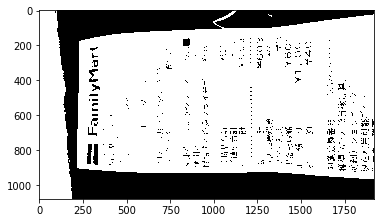

In [12]:
im = cv2.imread('../../img/train/a0i6ftk5.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,100,100,0)
plt.plot(), plt.imshow(thresh, 'gray')
plt.show()

In [13]:
# org_img = cv2.imread('../../img/train/a0i6ftk5.jpg')
# imgray = cv2.cvtColor(org_img,cv2.COLOR_BGR2GRAY)
# ret,thresh = cv2.threshold(imgray,100,100,0)
# image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# for cnt in contours:
#     if cv2.contourArea(cnt) > 1000:
#         cnt = contours[4]
#         [x, y, w, h] = cv2.boundingRect(cnt)
#         print(x,y,w,h)
#         cv2.rectangle(org_img, (x, y), (x + w, y + h), (0, 0, 255), 10)
#         plt.plot(), plt.imshow(org_img, 'gray')
#         plt.show()
#         break

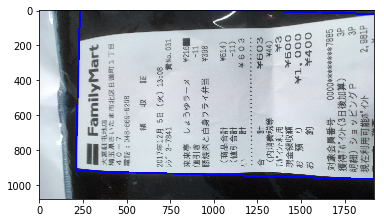

In [14]:
org_img = cv2.imread('../../img/train/a0i6ftk5.jpg')
imgray = cv2.cvtColor(org_img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,100,100,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    if cv2.contourArea(cnt) > 1000:
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        im = cv2.drawContours(org_img,[box],0,(0,0,255),10)
        plt.plot(), plt.imshow(im, 'gray')
        plt.show()
        break

In [15]:
def rect_img(org_img):
    imgray = cv2.cvtColor(org_img,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,100,100,0)
    image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) > 1000:
            rect = cv2.minAreaRect(cnt)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            W = rect[1][0]
            H = rect[1][1]
            Xs = [i[0] for i in box]
            Ys = [i[1] for i in box]
            x1 = min(Xs)
            x2 = max(Xs)
            y1 = min(Ys)
            y2 = max(Ys)
            center = ((x1+x2)/2,(y1+y2)/2)
            size = (x2-x1, y2-y1)
            cropped = cv2.getRectSubPix(org_img, size, center)
#             print("box" , box)
#             im = cv2.drawContours(org_img,[box],0,(0,0,255),50)
#             [x, y, w, h] = cv2.boundingRect(cnt)
#             print(x,y,w,h)
#             return im
#             return imgray[y:y+h, x:x+w]
            return cropped

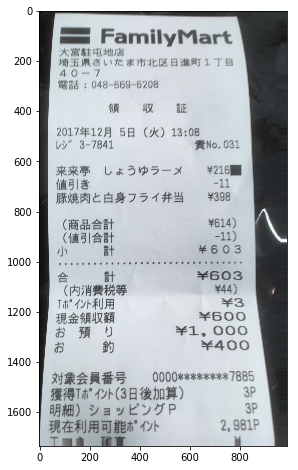

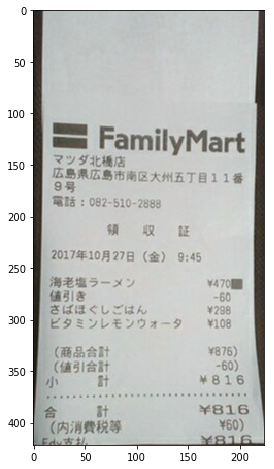

(422, 224, 3)


In [16]:
org_img = cv2.imread('../../img/train/a0i6ftk5.jpg')

plt.figure(figsize=(8,8))
plt.plot(), plt.imshow(rotate_image(rect_img(org_img), -90), 'gray')
plt.show()

org_img = cv2.imread("../../img/train/a5kdj9kr.jpg")
plt.figure(figsize=(8,8))
plt.plot(), plt.imshow(rotate_image(rect_img(org_img), -90), 'gray')
plt.show()

print(rotate_image(rect_img(org_img), -90).shape)

In [127]:
# ret,thresh = cv2.threshold(im_gray,127,255,0)
# image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# cnt = contours[4]
# image = cv2.drawContours(image, [cnt], 0, (0,255,0), 3)

# plt.plot(), plt.imshow(image, 'gray')
# plt.show()

# モルフォジー！

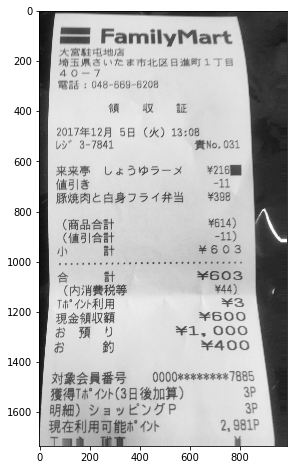

In [213]:
org_img = cv2.imread('../../img/train/a0i6ftk5.jpg')
org_img = rotate_image(rect_img(org_img), -90)

org_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)
# imS = cv2.resize(org_gray, (600, 600))
plt.figure(figsize=(8,8))
plt.plot(), plt.imshow(org_gray,cmap="gray")
plt.show()

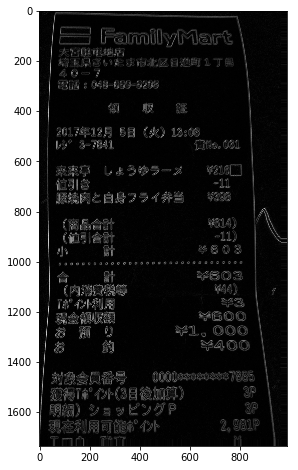

In [214]:
morphStructure = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)) #3 * 3のカーネル
gradient = cv2.morphologyEx(org_gray, cv2.MORPH_GRADIENT, morphStructure) #モルフォジー勾配
# imS = cv2.resize(gradient, (600, 600))
plt.figure(figsize=(8,8))
plt.plot(), plt.imshow(gradient,cmap="gray")
plt.show()

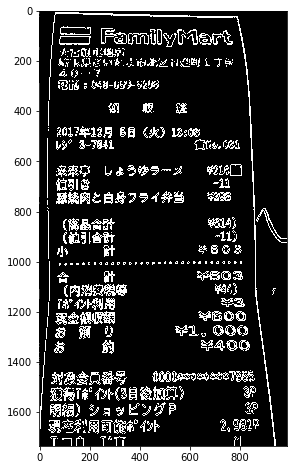

In [215]:
ret2, binary = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# imS = cv2.resize(binary, (600, 600))
plt.figure(figsize=(8,8))
plt.plot(), plt.imshow(binary,cmap="gray")
plt.show()

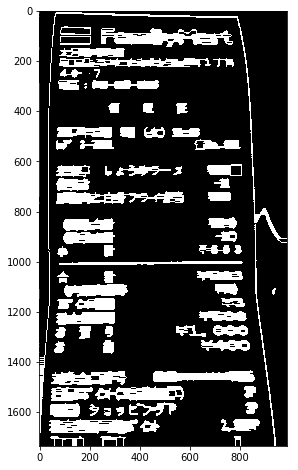

In [260]:
morphStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 1))
# morphStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 10))
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, morphStructure)
# imS = cv2.resize(closed, (600, 600))

plt.figure(figsize=(8,8))
plt.plot(), plt.imshow(closed,cmap="gray")
plt.show()

337


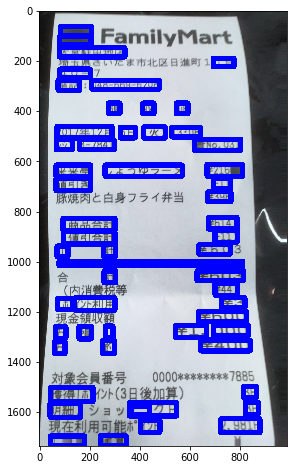

In [261]:
org_img = cv2.imread('../../img/train/a0i6ftk5.jpg')
org_img = rotate_image(rect_img(org_img), -90)

_, contours, hierarchy = cv2.findContours(closed, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
rectangle_position = []
print(len(contours))
for cnt in contours:
    if 1000 < cv2.contourArea(cnt) and cv2.contourArea(cnt) < 10000:
        [x, y, w, h] = cv2.boundingRect(cnt)
        if h < 10 or w < 10:
            continue
        crop_closed = closed[y:y+h, x:x+w]
        r = cv2.countNonZero(crop_closed)/(w * h)
        if r > 0.2:
            rectangle_position.append((x, y, x + w, y + h, ((y + y + h) / 2)))
            cv2.rectangle(org_img, (x, y), (x + w, y + h), (0, 0, 255), 20)

plt.figure(figsize=(8,8))
plt.plot(), plt.imshow(org_img,cmap="gray")
plt.show()

(480, 368, 3)
(422, 224, 3)
21


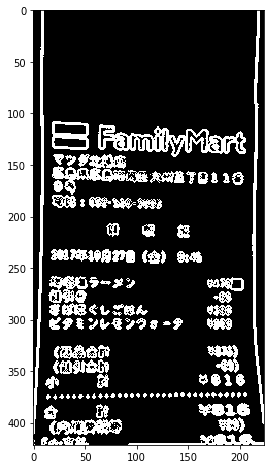

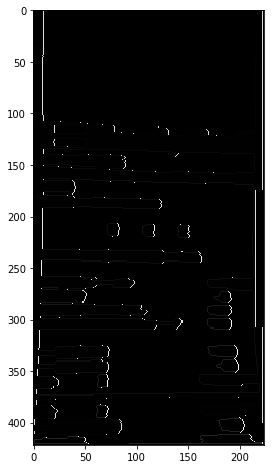

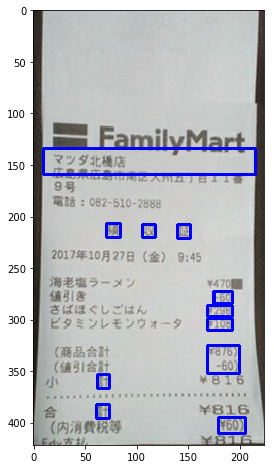

In [157]:
org_img = cv2.imread("../../img/train/a5kdj9kr.jpg")
print(org_img.shape)
org_img = rotate_image(rect_img(org_img), -90)
# org_img = org_img.reshape(org_img.shape[0], org_img.shape[1], 1)
print(org_img.shape)
org_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)
morphStructure = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)) #3 * 3のカーネル
gradient = cv2.morphologyEx(org_gray, cv2.MORPH_GRADIENT, morphStructure) #モルフォジー勾配
ret2, binary = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
morphStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 1))
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, morphStructure)
_, contours, hierarchy = cv2.findContours(closed, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
rectangle_position = []
print(len(contours))
for cnt in contours:
    if cv2.contourArea(cnt) > 1:
        [x, y, w, h] = cv2.boundingRect(cnt)
        if h < 10 or w < 10:
            continue
        crop_closed = closed[y:y+h, x:x+w]
        r = cv2.countNonZero(crop_closed)/(w * h)
        if r > 0.45:
            rectangle_position.append((x, y, x + w, y + h, ((y + y + h) / 2)))
            cv2.rectangle(org_img, (x, y), (x + w, y + h), (0, 0, 255), 2)

plt.figure(figsize=(8,8))
plt.plot(), plt.imshow(binary,cmap="gray")
plt.show()            

plt.figure(figsize=(8,8))
plt.plot(), plt.imshow(closed,cmap="gray")
plt.show()            
            
plt.figure(figsize=(8,8))
plt.plot(), plt.imshow(org_img,cmap="gray")
plt.show()


# plt.figure(figsize=(8,8))
# plt.plot(), plt.imshow(rotate_image(rect_img(org_img), -90), 'gray')
# plt.show()


# MSER

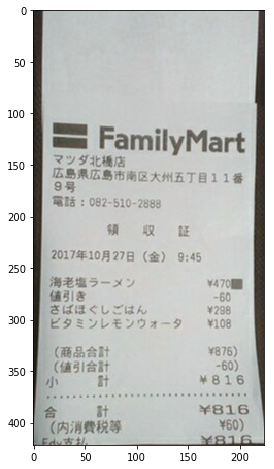

(422, 224, 3)


In [17]:
org_img = cv2.imread("../../img/train/a5kdj9kr.jpg")
plt.figure(figsize=(8,8))
plt.plot(), plt.imshow(rotate_image(rect_img(org_img), -90), 'gray')
plt.show()

print(rotate_image(rect_img(org_img), -90).shape)

In [28]:
#Create MSER object
mser = cv2.MSER_create()

#Your image path i-e receipt path
img = org_img

#Convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = gray.reshape(gray.shape[1], gray.shape[0], 1)

vis = img.copy()

print(gray.shape)
print(vis.shape)

#detect regions in gray scale image
regions, _ = mser.detectRegions(gray)

# hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

# cv2.polylines(vis, hulls, 1, (0, 255, 0))

# plt.figure(figsize=(8,8))
# plt.plot(), plt.imshow(vis, 'vis')
# plt.show()

# cv2.imshow('img', vis)



(368, 480, 1)
(480, 368, 3)


In [ ]:
cv2.waitKey(0)

mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)

for contour in hulls:

    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

#this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("text only", text_only)

cv2.waitKey(0)